In [1]:
import pandas as pd
import numpy as np

In [2]:
htension_data = pd.read_csv("healthcare-dataset-stroke-data.csv")
htension_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
htension_data.isna().sum().sort_values()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
bmi                  201
dtype: int64

In [4]:
htension_data.shape

(5110, 12)

In [5]:
htension_data = htension_data.dropna(subset=["bmi"])

In [6]:
htension_data.isna().sum().sort_values()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Converting categorical variables to numerical variables

In [7]:
htension_data = pd.get_dummies(data=htension_data, columns = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"])
htension_data.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5,56669,81.0,0,0,186.21,29.0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0


In [47]:
print(len(htension_data[htension_data["hypertension"] == 1]))
print(len(htension_data[htension_data["hypertension"] == 0]))

451
4458


# Predicting Hypertension using Logistic Regression

In [57]:
from sklearn.model_selection import train_test_split

X = htension_data.drop(["hypertension", "id"], axis=1)
y = htension_data["hypertension"].values

X

,age,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,1,228.69,36.6,1,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
2,80.0,1,105.92,32.5,1,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,171.23,34.4,1,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,0,174.12,24.0,1,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
5,81.0,0,186.21,29.0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,103.08,18.6,0,1,0,0,1,0,...,0,0,0,1,1,0,1,0,0,0
5106,81.0,0,125.20,40.0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,82.99,30.6,0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,166.29,25.6,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [62]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=2000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg.fit(X_train, y_train)

prediction = logreg.predict(X_test)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [60]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [63]:
# Prediction probability
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
y_pred_prob[0]

0.22223102699187686

In [64]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, prediction)

array([[892,   3],
       [ 85,   2]], dtype=int64)

In [65]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       895
           1       0.40      0.02      0.04        87

    accuracy                           0.91       982
   macro avg       0.66      0.51      0.50       982
weighted avg       0.87      0.91      0.87       982



In [66]:
logreg.score(X_test, y_test)

0.9103869653767821

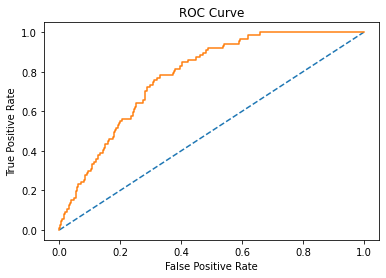

In [67]:
# ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], ls="--")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [68]:
roc_auc_score(y_test, y_pred_prob)

0.7794516149746357

# Predicting using KNN

In [69]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)
knn_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [70]:
# Accuracy
knn.score(X_test, y_test)

0.9042769857433809

In [71]:
# COnfusion matrix
confusion_matrix(y_test, knn_pred)

array([[878,  17],
       [ 77,  10]], dtype=int64)

In [72]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       895
           1       0.37      0.11      0.18        87

    accuracy                           0.90       982
   macro avg       0.64      0.55      0.56       982
weighted avg       0.87      0.90      0.88       982



In [73]:
# Improving performance using GridSearchCV
from sklearn.model_selection import GridSearchCV, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

knn2 = KNeighborsClassifier()
param_grid = {"n_neighbors" : np.arange(1, 30)}
knn2_grid = GridSearchCV(knn2, param_grid, cv=kf)

knn2_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [74]:
knn2_grid.best_params_

{'n_neighbors': 26}

In [75]:
knn2_grid.best_score_

0.9068047519489151

In [34]:
print(knn2_grid.predict(X_test))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 